## Companion notebook for "Enhancing reproducibility in bioimage analysis: focus on controls and effect sizes, not just p-values"

In this notebook, you will be able to explore the data and graphs shown in the paper titled "Enhancing reproducibility in bioimage analysis: focus on controls
and effect sizes, not just p-values".

#### Import utility functions

In [1]:
from utility_functions import *

#### Set up parameters for plots

In [2]:
plt.rcParams['font.size'] = 26
plt.rcParams['axes.linewidth'] = 2
color_dict = {'ARHGAP23': 'orange',
              'Neg Control': 'blue',
              'Tech Control': 'gray',
              'LATS2': 'purple'}
y_label = 'Relative Nuclear YAPTAZ Localisation'

#### Set up variables

In [3]:
plate_number = 'LM2_ONTARGETPlus_2A'
treatment_col = 'Treatment'
variable_of_interest = 'YAPTAZ_Ratio'
idr_annotations_file_path = '../inputs/idr/idr0028-screenB-annotation.csv'
#directories = ('../inputs/idr', '../outputs/plots', '../outputs/data')

#### Load CellProfile analysis output

In [4]:
annotations = load_and_prepare_data(idr_annotations_file_path, plate_number)
compounds = annotations[annotations['Control Type'] == 'Treated'].set_index('Well')['Gene Symbol'].to_dict()
treatments_to_compounds = {'Treated': 'Treated', 'negative control': 'Neg Control',
                           'technical control': 'Tech Control', 'positive control': 'LATS2'}
image_data = pd.read_csv('../inputs/cell_profiler_outputs/idr0028/screenB/LM2_GEFGAP_ONTARGETPlus_2A/Image.csv')
nuc_data = pd.read_csv('../inputs/cell_profiler_outputs/idr0028/screenB/LM2_GEFGAP_ONTARGETPlus_2A/Nuclei.csv')
cyto_data = pd.read_csv('../inputs/cell_profiler_outputs/idr0028/screenB/LM2_GEFGAP_ONTARGETPlus_2A/Cytoplasm.csv')
image_indices = pd.read_csv('../inputs/idr/LM2_GEFGAP_ONTARGETPlus_2A_ImageIndex.ColumbusIDX.csv', delimiter='\t')
treatments = annotations.set_index('Well')['Control Type'].to_dict()

#### Select data subsets

In [5]:
data_subset = prepare_data(nuc_data, cyto_data, image_data, image_indices, treatments, treatments_to_compounds,
                           compounds,
                           ['E06', 'O03', 'L01', 'L23'])

#### Plot figures
##### Figure 2A-F

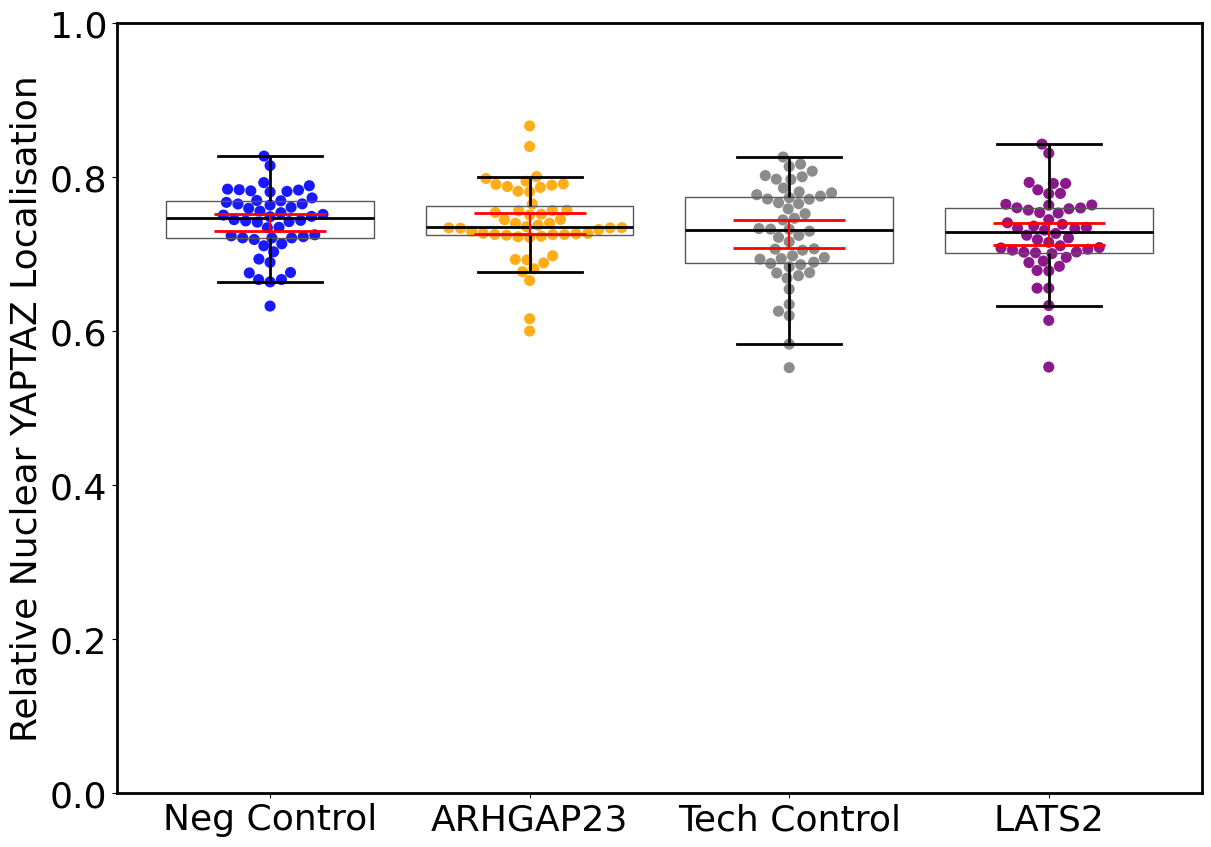

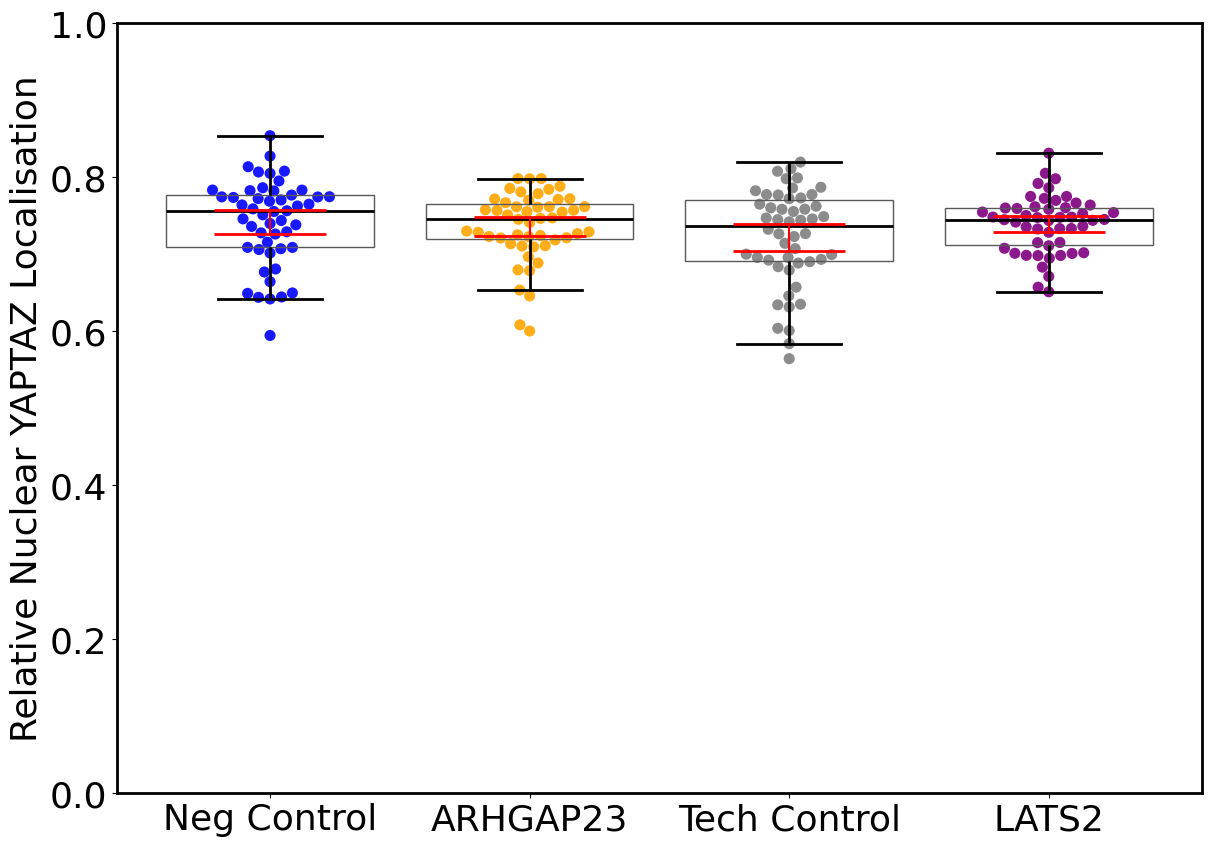

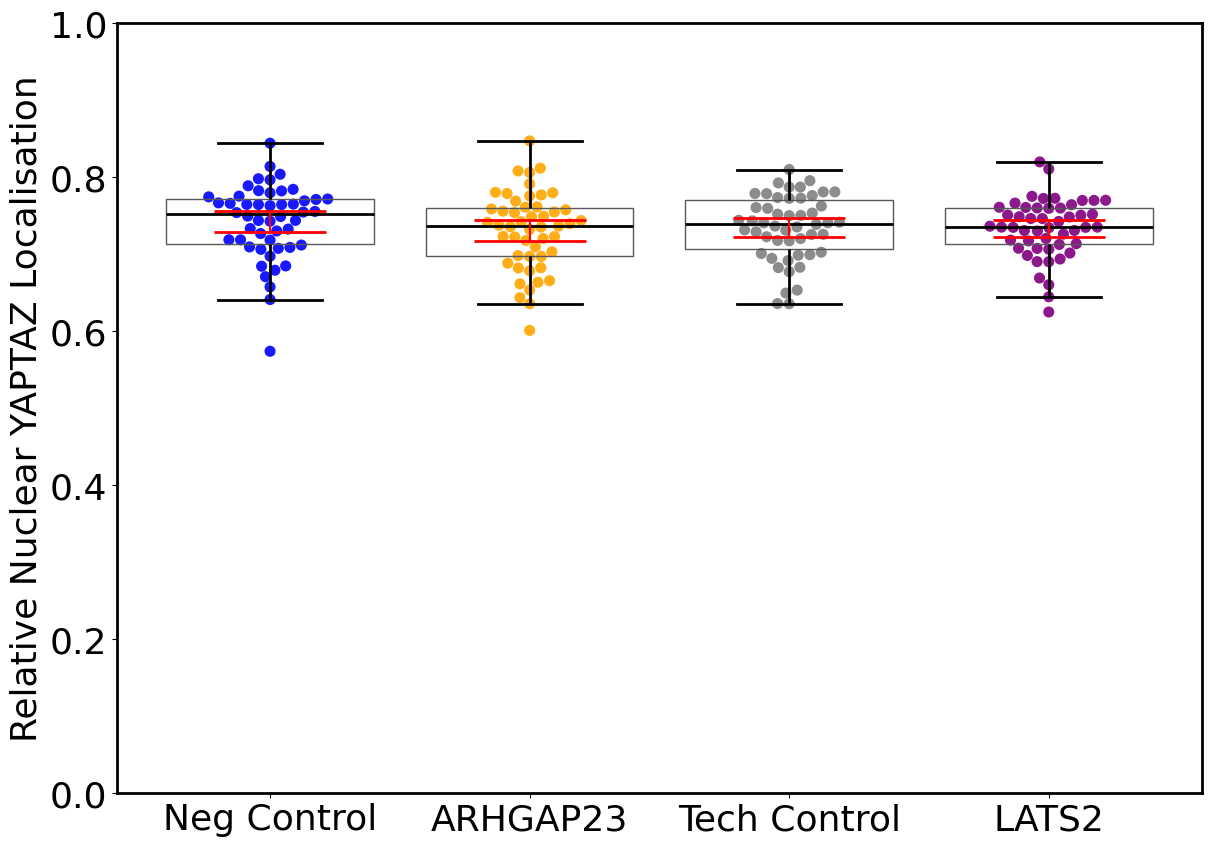

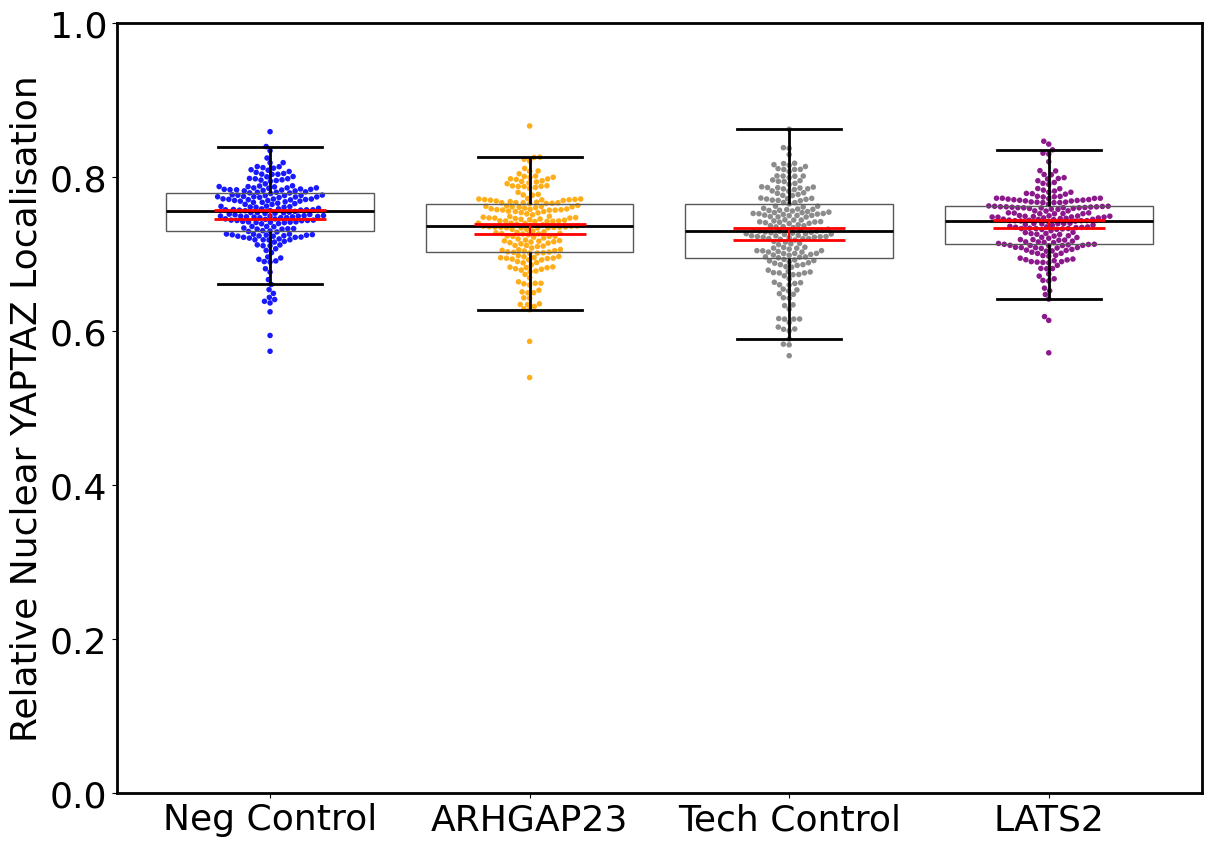

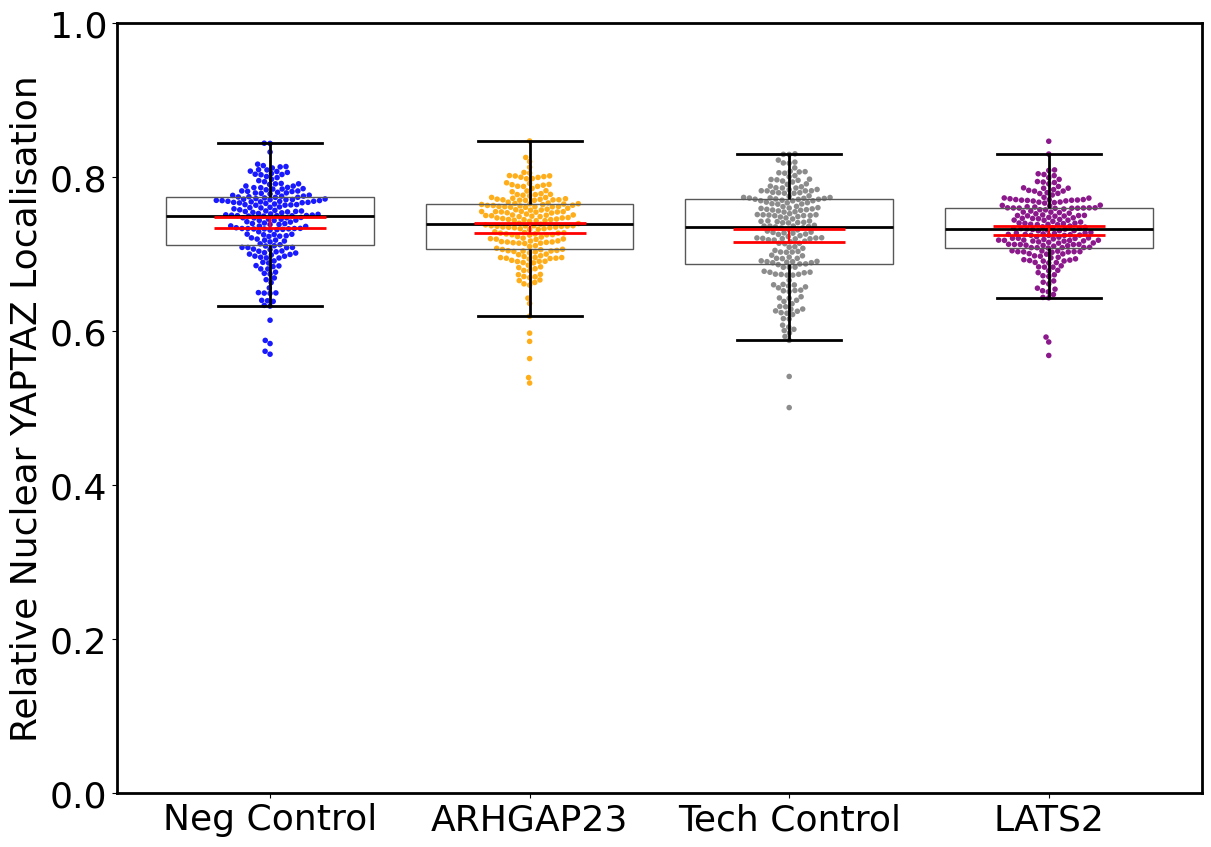

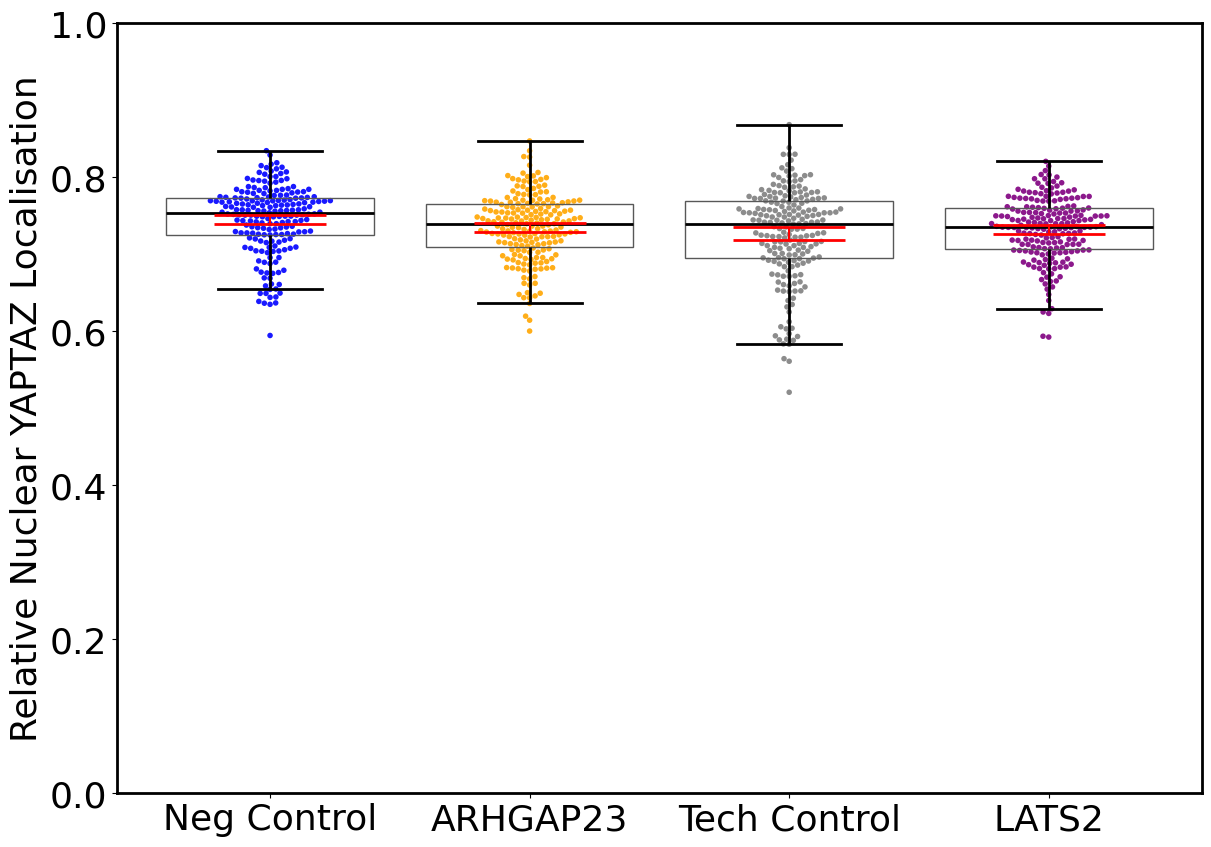

In [6]:
point_size = 8
random_seed = 42
for s in [50, 200]:
    if s > 50:
        point_size = 4
    for i in range(3):
        generate_swarmplot(['Neg Control', 'ARHGAP23', 'Tech Control', 'LATS2'], data_subset, color_dict,
                           treatment_col, variable_of_interest, y_label,
                           point_size=point_size, random_seed=random_seed, sample_size=s)
        random_seed = random_seed + 1

##### FIGURE 2 G - I

In [ ]:
plot_effect_size_v_sample_size([*range(10, 500, 10)], 100, data_subset, treatment_col, variable_of_interest,
                               'Median Effect Size Relative to Untreated', ['SN0212398523', 'DMSO', 'Leptomycin b'])

##### Figure 3A

In [ ]:
plot_iqr_v_sample_size([*range(10, 500, 10)], 100, data_subset, treatment_col, variable_of_interest,
                       'Error in Inter-Quartile Range')

##### Figure 3B-H

In [ ]:
plot_cumulative_histogram_samples(data_subset, variable_of_interest, treatment_col, 'Untreated', y_label)

##### Figure 4A-C

In [ ]:
selected_treatments = ['Untreated', 'DMSO', 'SN0212398523', 'SN1054616339', 'SN1066932540', 'Leptomycin b']
point_size = {50: 8, 200: 4, 500: 2.5}
for s in [50, 200, 500]:
    generate_superplot(selected_treatments, selected_treatments,
                       prepare_data(nuc_data, cyto_data, image_data, treatments, treatments_to_compounds,
                                    compounds,
                                    ['J05', 'I19', 'G15', 'O02', 'B02', 'N12', 'L08', 'L18', 'H13', 'E22',
                                     'H10', 'B06']), color_dict, treatment_col, variable_of_interest,
                       y_label, sample_size=s, point_size=point_size[s])

##### Supplementary Figure 1

In [ ]:
generate_swarmplot(['Untreated', 'DMSO', 'SN0212398523', 'Leptomycin b'], data_subset, color_dict, treatment_col,
                   variable_of_interest, y_label, p_values=True)